In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from datetime import datetime

In [2]:
def function_of_z(z, b):
    return ((z**2 + 1)/(2*z))**b

In [8]:
def check_for_divergence(z):
    z_array = np.zeros(30, dtype=complex)
    z_array[0] = z
    
    for i in range(1, len(z_array)):
        z_array[i] = function_of_z(z_array[i-1], 2)
        if np.isnan(z_array[i]):
            break
    
    if any(np.isnan(z_array)):
        return 0, 0
    epsilon = 10**-100
    if abs(z_array[-1].real - 1) < epsilon or abs(z_array[-1].imag - 1) < epsilon:
        return 1, z
    else:
        return 2, z

In [9]:
start = time.time()
random.seed(datetime.now().timestamp())
random_array = np.zeros(10**7, dtype=complex)
x, y = 0, 0
for i in range(0, 10**7):
    x = random.uniform(-4, 4)
    y = random.uniform(-8, 8)
    random_array[i] = complex(x, y)
end = time.time()
print(end-start)

10.606107950210571


In [10]:
start = time.time()

check_list = []
check_list_flow = []

for i in range(0, 10**6):
    check_num, z = check_for_divergence(random_array[i])
    if check_num == 1 and check_num != 0:
        check_list.append(random_array[i])
    elif check_num == 2 and check_num != 0:
        check_list_flow.append(random_array[i])
        
    
    '''if check_for_divergence(random_array[i])[0] == 1:
        check_list.append(random_array[i])'''

end=time.time()
print(end-start)

check_array = np.array(check_list)
check_array_flow = np.array(check_list_flow)

C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_20852\1992318710.py:2: RuntimeWarning: overflow encountered in scalar power
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_20852\1992318710.py:2: RuntimeWarning: invalid value encountered in scalar power
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_20852\1992318710.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_20852\1992318710.py:2: RuntimeWarning: overflow encountered in scalar divide
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_20852\1992318710.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return ((z**2 + 1)/(2*z))**b


35.23765778541565


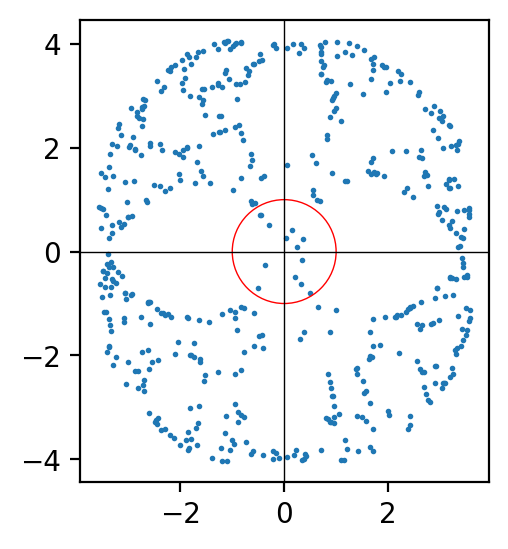

In [18]:
plt.figure(figsize=(3, 3), dpi=200)
# plt.scatter(check_array.real, check_array.imag, s=0.001, label = 'kuch bhi')
plt.scatter(check_array_flow.real, check_array_flow.imag, s = 1, label = 'fixed points')
plt.gca().set_aspect('equal')
circle1 = plt.Circle((0, 0), 1, color='r', fill=False, lw=0.5)

plt.gca().add_patch(circle1)
plt.axvline(0, color='k', lw = 0.5)
plt.axhline(0, color='k', lw = 0.5)